### Media outlets projection 

Notebook to create the layout of the media outlets projection by the BiCM.

In [1]:
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
# Data from the activity of users and sharing of news articles
df = pd.read_csv('Data/dataEchoChambers_with_article_info.csv')
shares = df.groupby('medio').count()['tw_id'].to_dict()

In [3]:
# Media outlets projection
graph = nx.read_gml('Results/media_network_p1.gml')

Communities detection:


In [4]:
communities = nx.community.louvain_communities(graph, seed = 123457)

Visualization:

In [5]:
# Visualization parameters 
colors = ['tab:red' if node in communities[0] else 'tab:blue' for node in graph.nodes()]
node_size = np.array([shares[node] for node in graph.nodes()])

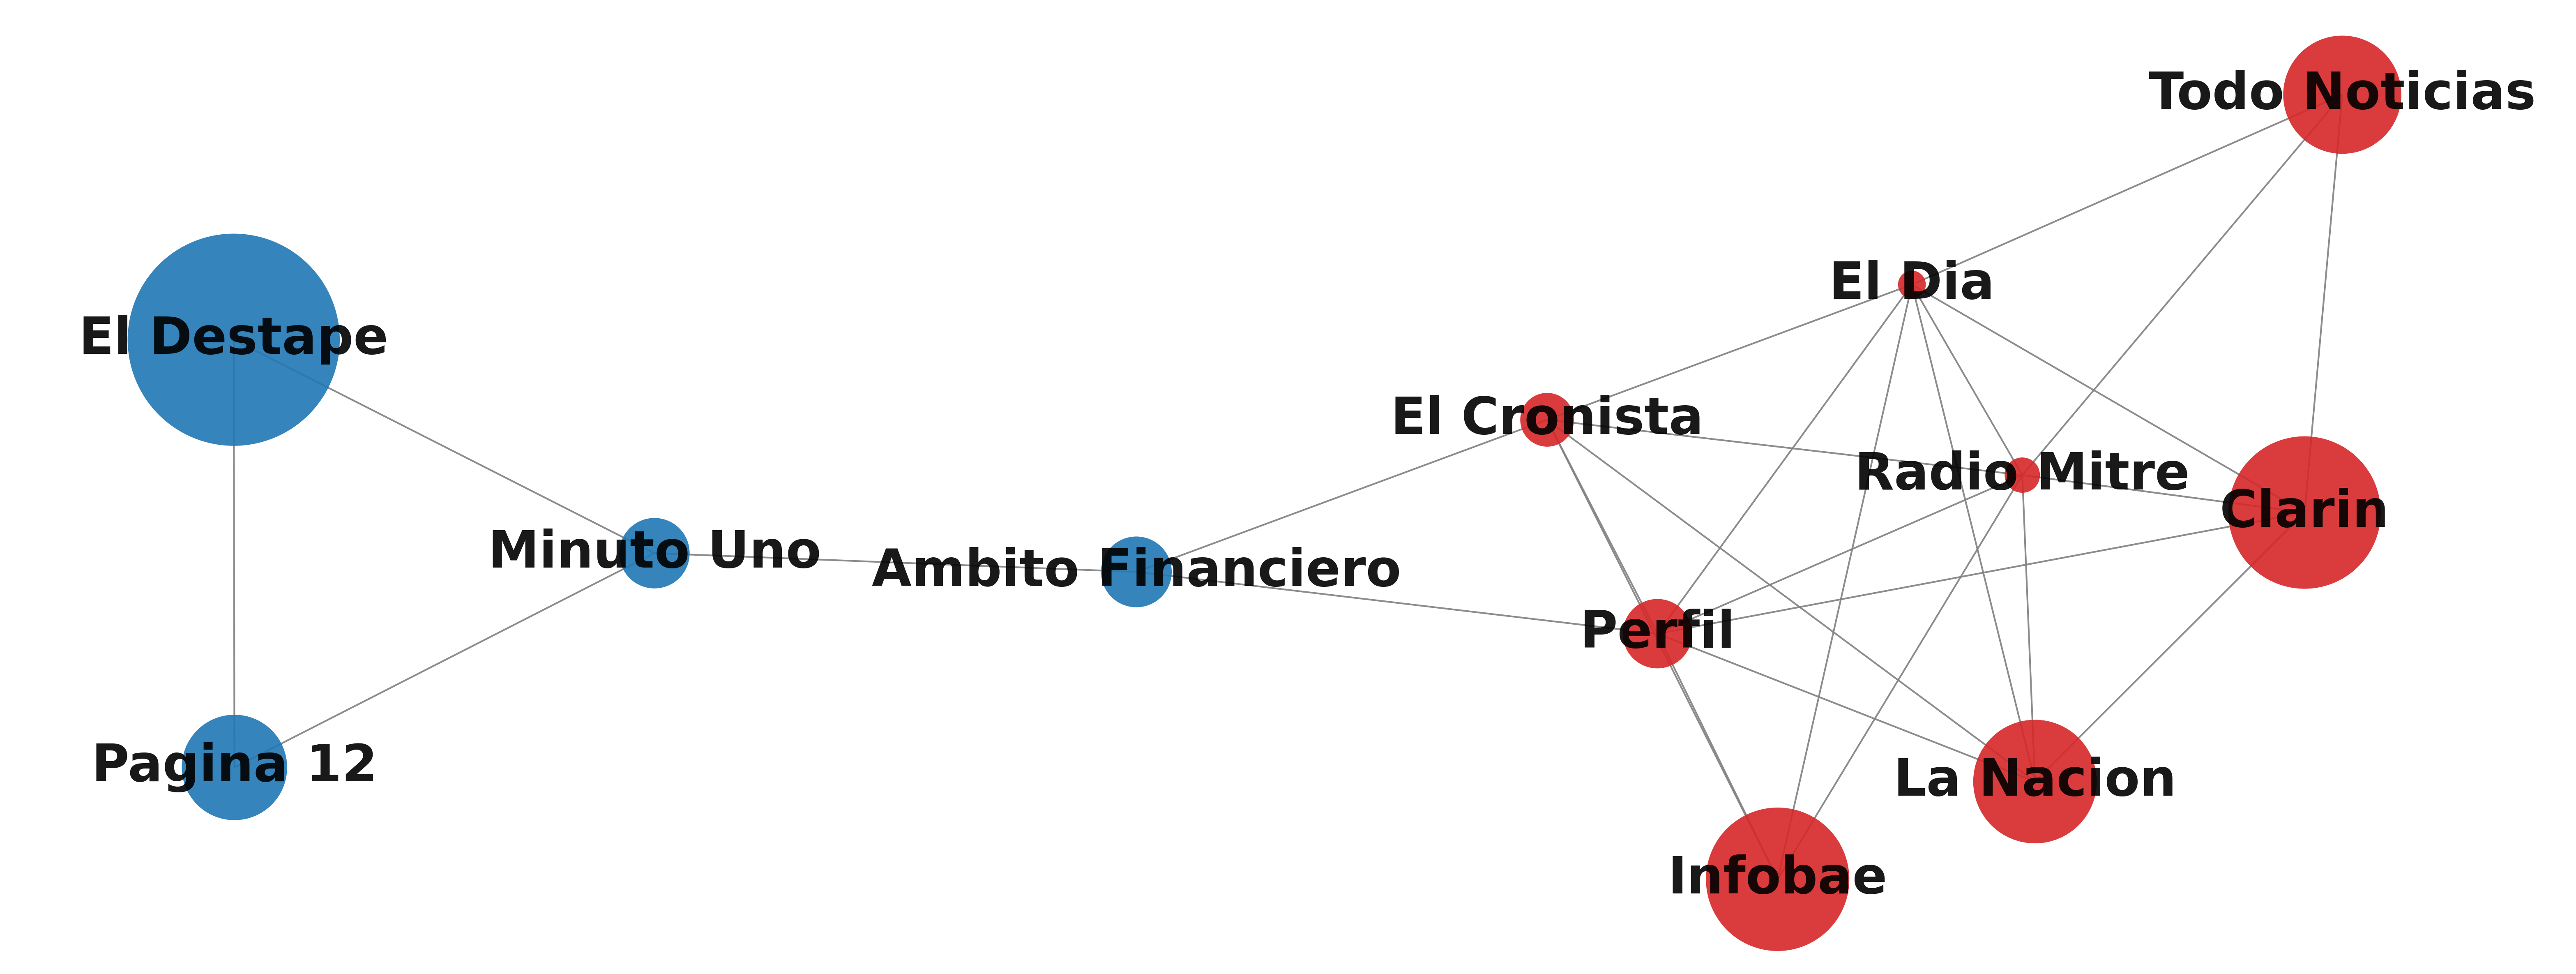

In [6]:
fig, ax = plt.subplots(dpi = 300, figsize = (21,8))

# Layout of the graph
pos = nx.kamada_kawai_layout(graph)

# Rotation of the layout
angle = 2.8*np.pi/4
M = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
pos_rotated = {}
for media in pos.keys():
    pos_rotated[media] = M.dot(pos[media])

# Network layout
nx.draw_networkx(graph, ax = ax, pos = pos_rotated, node_color = colors, 
                 node_size = 0.05*node_size, alpha = 0.90, font_size = 30, font_weight = 'bold',
                 edge_color = 'grey', width = 1, linewidths = 0)
ax.axis('off')

plt.tight_layout()
plt.savefig('Results/Media_outlets_projection.pdf')
plt.savefig('Results/Media_outlets_projection.png')
plt.show()